## Lab 2

In [18]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats

plt.style.use('seaborn')

#### Problem 1

##### Setup

In [19]:
# cosmic-ray background average 
X = 5.1
# gamma-ray source average 
Y = 8.9

##### A) 
Show how the probability distribution of the background changes as you integrate (sum) for more days.

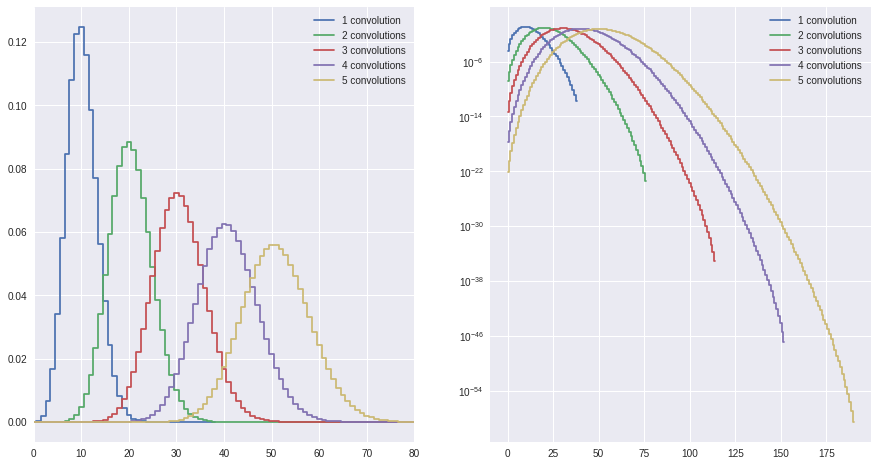

In [20]:
k = np.arange(0, 20, 1)
y = stats.poisson.pmf(k, X, loc = 0)
y = y / np.sum(y)

day_1 = np.convolve(y, y)
k1 = np.arange(0, len(day_1), 1)
day_i = day_1

fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].step(k1, day_1, label="1 convolution", where='mid')
ax[1].set_yscale("log")
ax[1].step(k1, day_1, label="1 convolution", where='mid')

convolutions = 4

for i in range(convolutions):
    day_i = np.convolve(day_i, day_1)
    k_i = np.arange(0, len(day_i), 1) 
    ax[0].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    ax[1].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    
ax[0].legend(loc=0)
ax[0].set_xlim([0, 80])

ax[1].legend(loc=0)
    
plt.show()

##### B)

Looking at just the 5th day

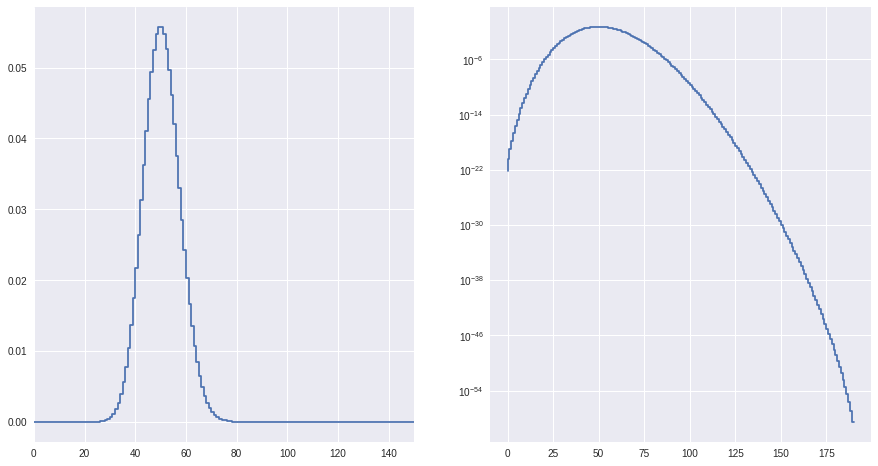

In [21]:
fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].step(k_i, day_i)
ax[0].set_xlim([0, 150])
ax[1].set_yscale("log")
ax[1].step(k_i, day_i)

plt.show()

The linear plot could almost be mistaken as Gaussian (though it's discreet, not continuous, and has a long rightward tail), but the log plot is obviously non-parabolic.

##### C) 

Show how the probability distribution evolves as you average days.

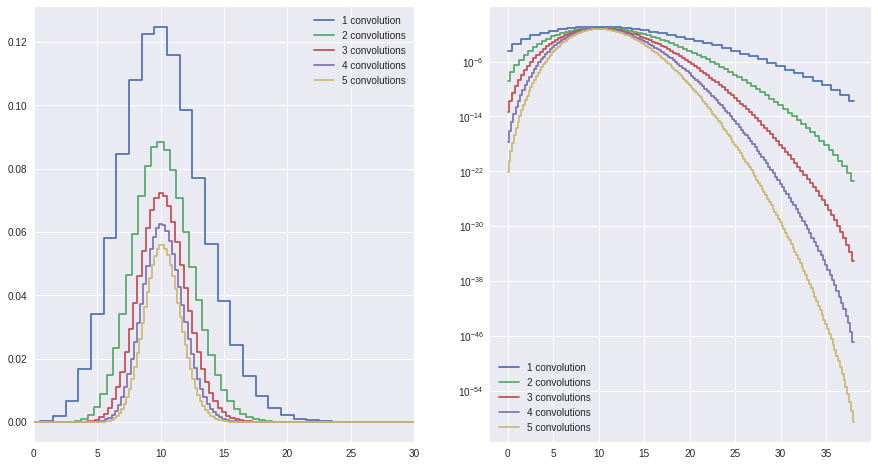

In [22]:
k = np.arange(0, 20, 1)
y = stats.poisson.pmf(k, X, loc = 0)
y = y / np.sum(y)

day_1 = np.convolve(y, y)
k1 = np.arange(0, len(day_1), 1)
day_i = day_1

fig, ax = plt.subplots(1, 2, figsize = (15, 8))

ax[0].step(k1, day_1, label="1 convolution", where='mid')
ax[1].set_yscale("log")
ax[1].step(k1, day_1, label="1 convolution", where='mid')

convolutions = 4

for i in range(convolutions):
    day_i = np.convolve(day_i, day_1)
    k_i = np.arange(0, len(day_i), 1) / (i+2) 
    ax[0].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    ax[1].step(k_i, day_i, label=str(i+2)+" convolutions", where='mid')
    
ax[0].legend(loc=0)
ax[0].set_xlim([0, 30])

ax[1].legend(loc=0)
    
plt.show()

The average value stays the same. As you average for more days, the distribution has a finer gradient and begins looking more Gaussian.

##### D)

Finding the Xσ of detecting 8.9 (Y) gamma rays after 30 days.

**Statistical question:** what's the chance the cosmic-ray background produced a measurement as signal-like or more than my detected measurement of 8.9 after 30 days? 

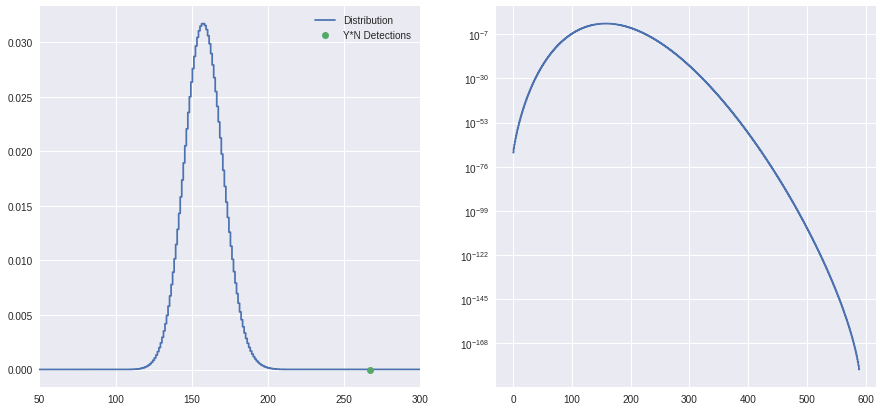

In [23]:
N = 30

k = np.arange(0, 20, 1)
y = stats.poisson.pmf(k, X, loc=0)
y = y / np.sum(y)

day_1 = y
day_N = day_1

for i in range(N):
    day_N = np.convolve(day_N, day_1)
    
k_N = np.arange(0, len(day_N), 1)

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

ax[0].step(k_N, day_N, where='mid', label='Distribution')
ax[0].set_xlim([50, 300])

ax[1].set_yscale("log")
ax[1].step(k_N, day_N, where='mid')

# find the index of Y*N on the graph
index = np.where(k_N == Y*N)
ax[0].plot(Y*N, day_N[index], 'o', label="Y*N Detections")
ax[0].legend(loc=0)

plt.show()

In [24]:
# Integrate that distribution

# for i in range(len(k_n)):
    
where = [True]*len(k_N)

for i in range(index[0][0]):
    where[i] = False

prob = np.sum(day_N, where=where)

sigma = stats.norm.ppf(prob, loc=0, scale=1)

print('There is a '+str(abs(round(sigma,2)))+
      'σ chance the background produced my detected value.')

There is a 7.86σ chance the background produced my detected value.


#### Problem 2

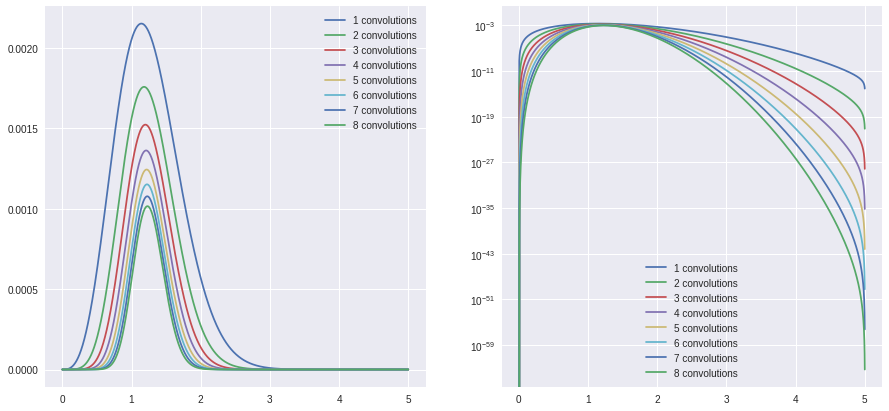

In [25]:
distr_start = 0
distr_stop = 5

k = np.linspace(distr_start, distr_stop, 1000)
y = stats.rayleigh.pdf(k, loc = 0, scale = 1)
y = y / np.sum(y)

final = y

convolutions = 8

fig, ax = plt.subplots(1, 2, figsize=(15, 7))

for i in range (convolutions):
    final = np.convolve(final, y)
    k_final = np.linspace(distr_start, distr_stop, len(final))
    
    ax[0].plot(k_final, final, label=str(i+1)+" convolutions")
    
    ax[1].set_yscale("log")
    ax[1].plot(k_final, final, label=str(i+1)+" convolutions")
    
ax[0].legend(loc=0)
ax[1].legend(loc=0)

plt.show()

#### Problem 3

Setup: the CCD background is a zero-mean Gaussian with constant width over the image

#### Version 1

##### A)
Measured width of background Gaussian distribution X = 12, signal of strength Y = 18.2

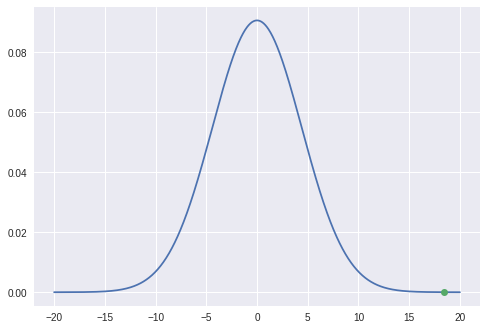

In [26]:
# background width
X = 4.4
# signal
Y = 18.4

fig, ax = plt.subplots(1,1)
x = np.linspace(-20, 20, 1000)
background_distr = stats.norm.pdf(x, loc=0, scale=X)

ax.plot(x, background_distr)
ax.plot(Y, stats.norm.pdf(Y, loc=0, scale=X), 'o')
plt.show()

In [27]:
# Calculate probability

prob = stats.norm.sf(Y, loc=0, scale=X)
sigma = stats.norm.ppf(prob, loc=0, scale=1)

print("The significance of my measurement is "+str(abs(round(sigma,2)))+
      "σ, not a discovery.")

The significance of my measurement is 4.18σ, not a discovery.


#### Version 2

##### B)

If you have to look for a signal in 10k pixels, what is the probability distribution of your background?

In [90]:
x = np.linspace(-20, 20, 1000)
background_distr = stats.norm.pdf(x, loc=0, scale=X)
orig = background_distr / np.sum(background_distr)

final = orig*10000

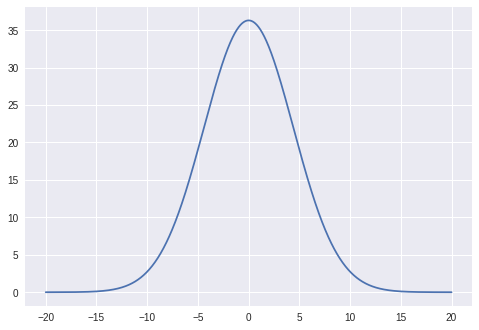

In [91]:
fig, ax = plt.subplots(1,1)
ax.plot(x, final)
plt.show()

##### C)

Taking your brightest candidate signal from the region (assume it has the same signal as in part 1), calculate the significance of your detection.

In [93]:
where = [True]*len(x)

for i in range(len(x)):
    index = i
    where[i-1] = False
    if abs(x[index] - Y) < 0.01:
        break
        
prob = np.sum(final, where=where)

sigma = stats.norm.ppf(prob, loc=0, scale=1)

round(abs(sigma),2)

1.18

With a trials factor, the same candidate has a sigificance of 1.18 instead of 4.18.

### Problem 4

In [31]:
x = np.linspace(-20, 20, 1000)
background_distr = stats.norm.pdf(x, loc=0, scale=X)

##### A)

Calculate the signal required for a 5-sigma detection in Version 1

In [32]:
sigma = 5
prob = stats.norm.cdf(sigma, loc=0, scale=1)
signal = stats.norm.ppf(prob, loc=0, scale=X)

round(signal,2)

22.0

##### B)

Calculate the signal required for a 5-sigma detection in Version 2

In [95]:
sigma = 5
prob = stats.norm.cdf(sigma, loc=0, scale=1)

where = [False]*len(final)

for i in range(len(final)):
    where[i] = True
    prob_i = np.sum(final, where=where) / 10000
    if abs(prob_i - prob) < 0.0000001:
        break

signal = x[i]
round(signal,2)

19.88

In [ ]:
^^ that's wrong